In [46]:
from datetime import datetime
import pandas as pd
import requests
from matplotlib import pyplot as plt
import os

from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from time import sleep

In [39]:
def remove_multiindex(df:pd.DataFrame):
	return df.droplevel(level=0,axis=1)

In [28]:

# link for extract html data
def getdata(url):
    r = requests.get(url)
    return r.text

def getdata_selenium(url):

    opts = Options()
    opts.headless = True

    assert opts.headless  # Operating in headless mode
    browser = Chrome(options=opts)
    browser.set_page_load_timeout(15)
    browser.get(url)
    txt = browser.page_source
    browser.close()
    return txt

In [ ]:



def fetch_player_stats_single_year(year: int):
    df = pd.read_html(getdata(f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html'))[0]
    df_adv = pd.read_html(getdata(f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html'))[0]
    df_on_off = pd.read_html(getdata(f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html'))[0]

    df = df.drop(df[df['Player'] == 'Player'].index)

    df_adv = df_adv.drop(df_adv[df_adv['Player'] == 'Player'].index)

    df_on_off = df_on_off.drop(df_on_off[df_on_off['Player'] == 'Player'].index)

    new = pd.merge(df, df_adv, on=['Player', 'Age', 'Tm', 'Pos'])
    new = pd.merge(new,df_on_off , on=['Player', 'Age', 'Tm', 'Pos'])

    player_stats_list = ['Player', 'Pos', 'Age', 'Tm', 'G_x', 'GS', 'MP_x', 'FG', 'FGA',
                         'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
                         'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
                         'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
                         'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
                         'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

    player_stats_list_correct = ['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
                                 '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
                                 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER',
                                 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
                                 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
                                 'VORP']

    # cuts down the columns to what is listed in player_stats_list_correct
    new = new[player_stats_list]
    new.columns = player_stats_list_correct

    # This gets rid of traded players entirely
    new = new.drop_duplicates(subset='Player', keep=False).reset_index(drop=True)

    # Fills nan's with 0
    new.fillna(value=0, inplace=True)

    # Adds a year column
    new['Year'] = year

    if not os.path.isdir(f'Data/Test Sets/{datetime.now().strftime("%Y")}'):
        os.mkdir(f'Data/Test Sets/{datetime.now().strftime("%Y")}')

    new.to_csv(f'Data/Test Sets/{datetime.now().strftime("%Y")}/{datetime.now().strftime("%Y%m%d")}_player_stats.csv')
    print(datetime.now().strftime("%m/%d/%Y"), 'Complete')

In [58]:
df_list_1 = pd.read_html(getdata_selenium(f'https://www.basketball-reference.com/players/l/lowryky01.html'))
df_list_2 = pd.read_html(getdata_selenium(f'https://www.basketball-reference.com/players/w/westbru01.html'))

In [66]:

def process_df(df:pd.DataFrame):
    # df_on_off_1 = df_list_1[12]
    # df_on_off_2 = df_list_2[12]
    df = remove_multiindex(df)
    df.drop(range(df[df.Season == 'Career'].index[0],len(df)),inplace=True)
    # df.drop(range(df[df.Season == 'Career'].index[0],len(df)),inplace=True)

    df = df[[i for i in df.columns if 'Unnamed' not in i]]

    return df


,Season,Age,Tm,Lg,Pos,G,MP,PG%,SG%,SF%,...,Shoot,Off.,Off.,Shoot,Shoot,Off.,Off.,PGA,And1,Blkd
0,2006-07,20.0,MEM,NBA,PG,10.0,175.0,17%,83%,NaN,...,10.0,3.0,6.0,10.0,10.0,3.0,6.0,77.0,2.0,3.0
1,2007-08,21.0,MEM,NBA,PG,82.0,2089.0,92%,8%,NaN,...,144.0,22.0,48.0,75.0,144.0,22.0,48.0,724.0,25.0,66.0
2,2008-09,22.0,TOT,NBA,PG,77.0,1679.0,95%,5%,NaN,...,98.0,16.0,34.0,59.0,98.0,16.0,34.0,613.0,20.0,44.0
3,2008-09,22.0,MEM,NBA,PG,49.0,1071.0,98%,2%,NaN,...,68.0,8.0,22.0,40.0,68.0,8.0,22.0,392.0,15.0,30.0
4,2008-09,22.0,HOU,NBA,PG,28.0,608.0,88%,12%,NaN,...,30.0,8.0,12.0,19.0,30.0,8.0,12.0,221.0,5.0,14.0
5,2009-10,23.0,HOU,NBA,PG,68.0,1651.0,55%,45%,NaN,...,107.0,15.0,51.0,62.0,107.0,15.0,51.0,713.0,25.0,37.0
6,2010-11,24.0,HOU,NBA,PG,75.0,2563.0,92%,8%,NaN,...,88.0,20.0,25.0,74.0,88.0,20.0,25.0,1172.0,19.0,43.0
7,2011-12,25.0,HOU,NBA,PG,47.0,1510.0,100%,NaN,NaN,...,73.0,15.0,26.0,49.0,73.0,15.0,26.0,695.0,14.0,35.0
8,2012-13,26.0,TOR,NBA,PG,68.0,2020.0,96%,4%,NaN,...,85.0,11.0,28.0,100.0,85.0,11.0,28.0,965.0,13.0,44.0
9,2013-14,27.0,TOR,NBA,PG,79.0,2862.0,100%,NaN,NaN,...,125.0,20.0,48.0,95.0,125.0,20.0,48.0,1317.0,25.0,51.0


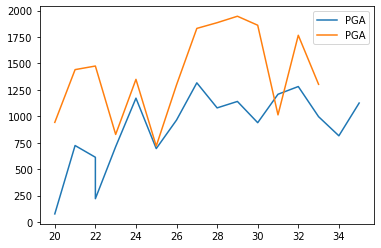

In [68]:
for i in [df_list_1,df_list_2,]:
    df = process_df(i[12])

    plt.plot('Age','PGA',data=df,)
    plt.legend()

# df_on_off_1.plot('Age','PGA')
# df_on_off_2.plot('Age','PGA')